In [182]:
import pandas as pd
data = pd.read_csv("Churn_Modelling.csv")
df = pd.DataFrame(data)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [183]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

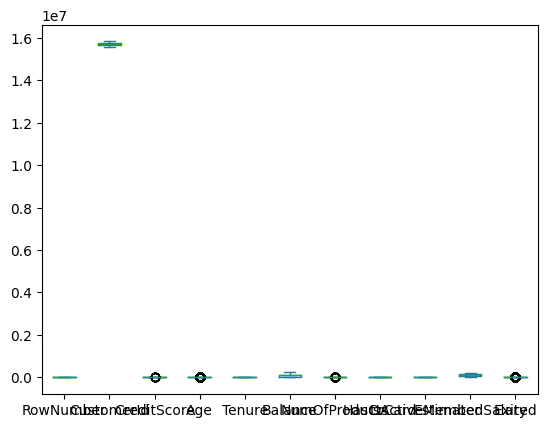

In [184]:
df.plot.box()

In [185]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
x = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)
y = df['Exited']
labelEncoder = LabelEncoder()
x['Gender'] = labelEncoder.fit_transform(x['Gender'])
x = pd.get_dummies(x, columns=['Geography'], drop_first=True)
print(x)

      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       0   42       2       0.00              1          1   
1             608       0   41       1   83807.86              1          0   
2             502       0   42       8  159660.80              3          1   
3             699       0   39       1       0.00              2          0   
4             850       0   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       1   39       5       0.00              2          1   
9996          516       1   35      10   57369.61              1          1   
9997          709       0   36       7       0.00              1          0   
9998          772       1   42       3   75075.31              2          1   
9999          792       0   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_Ge

C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [186]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(yTest)

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64


In [187]:
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

In [188]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation = 'relu', input_shape = (xTrain.shape[1],)),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [189]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [190]:
model.fit(xTrain, yTrain, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4532 - accuracy: 0.8069 - val_loss: 0.4047 - val_accuracy: 0.8356
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8398 - val_loss: 0.3721 - val_accuracy: 0.8450
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3582 - accuracy: 0.8530 - val_loss: 0.3570 - val_accuracy: 0.8512
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3457 - accuracy: 0.8605 - val_loss: 0.3483 - val_accuracy: 0.8556
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3394 - accuracy: 0.8594 - val_loss: 0.3444 - val_accuracy: 0.8569
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8637 - val_loss: 0.3433 - val_accuracy: 0.8606
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3310 - accuracy: 0.8619 - val_loss: 0.3441 - val_accuracy: 0.8612
Epoch 

In [191]:
yPred = model.predict(xTest)
yPredBinary = [1 if var>0.5 else 0 for var in yPred]

63/63 [==============================] - 0s 2ms/step


In [192]:
from sklearn.metrics import accuracy_score, confusion_matrix
aS = accuracy_score(yTest,yPredBinary)
cM = confusion_matrix(yTest,yPredBinary)

C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

In [193]:
print("1.\n", aS)
print("2.\n", cM)

1.
 0.8575
2.
 [[1534   73]
 [ 212  181]]
